**DATA ANALYSIS**

In [11]:
!gdown --id 1emIPmJu7j_pA5iPJst_Dj5P4Vr6bK9Hb

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1emIPmJu7j_pA5iPJst_Dj5P4Vr6bK9Hb
To: /content/Titanic-Dataset.xlsx
100% 61.5k/61.5k [00:00<00:00, 9.51MB/s]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [15]:
import pandas as pd

# Assuming 'Titanic-Dataset.xlsx' is in the same directory as your notebook
df = pd.read_excel('Titanic-Dataset.xlsx')

# Display the first 5 rows to check if the data has been loaded successfully
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.shape

(891, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.Age.mean()

29.69911764705882

In [21]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

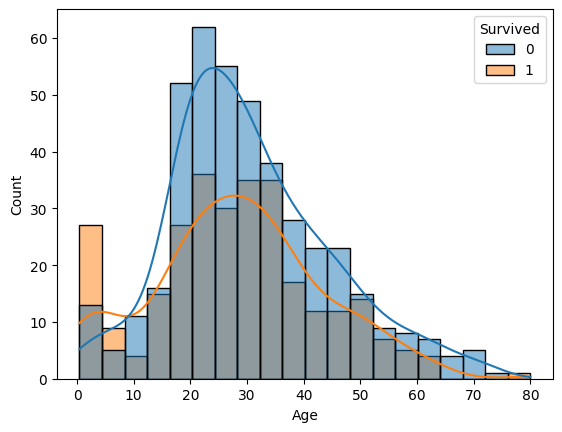

In [25]:
sns.histplot(x='Age',hue='Survived',data=df,kde=True)
plt.show()

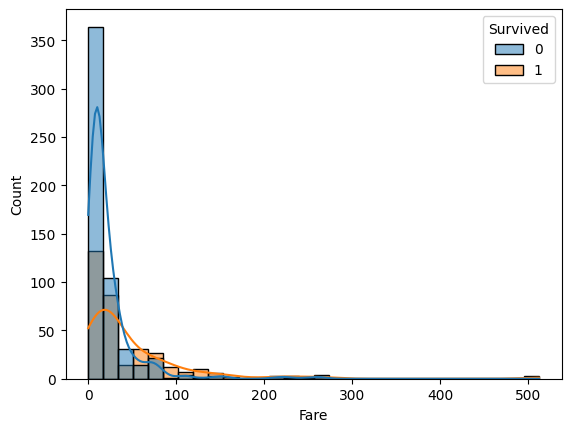

In [27]:
sns.histplot(x='Fare',hue='Survived',data=df,kde=True,bins=30)
plt.show()

<Figure size 1000x800 with 0 Axes>

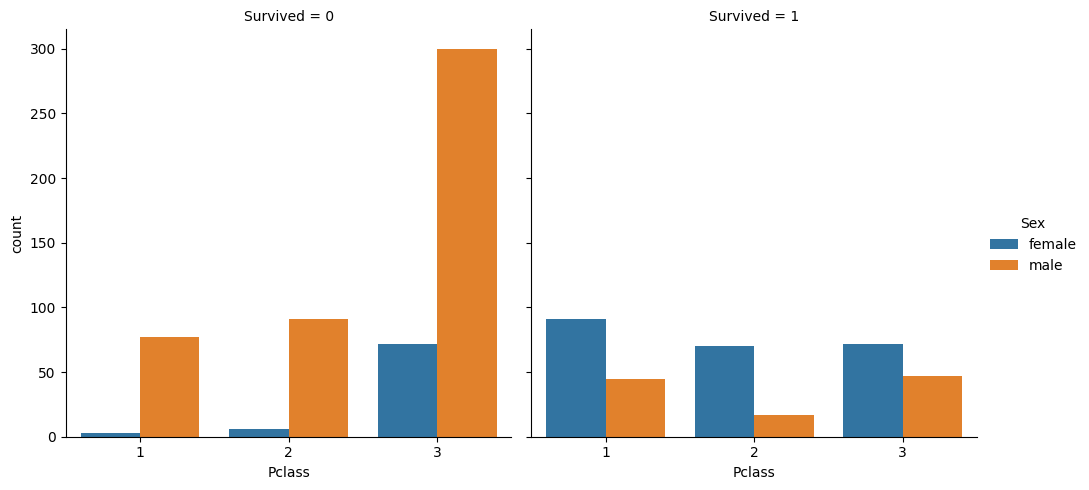

In [28]:
plt.figure(figsize=(10,8))
sns.catplot(x='Pclass',hue='Sex',col='Survived',kind='count',data=df)
plt.show()

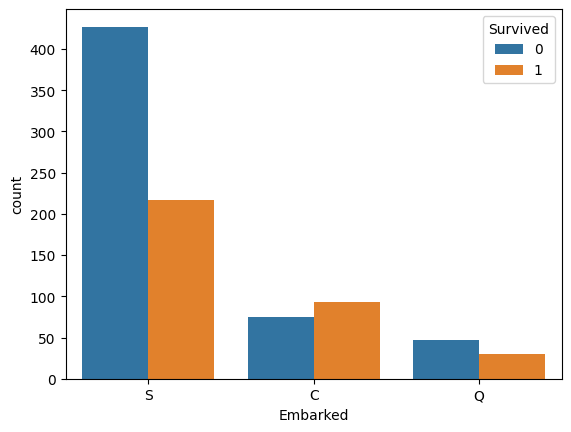

In [30]:
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.show()

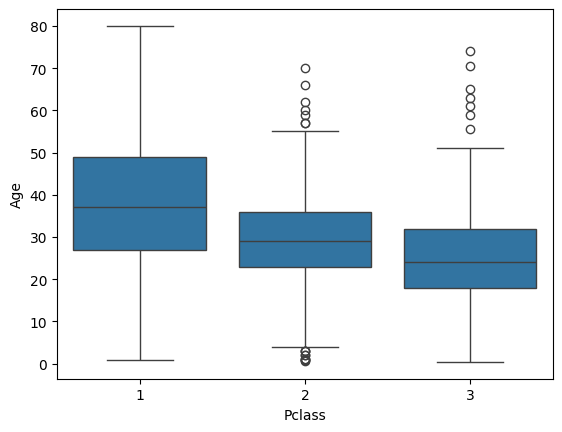

In [32]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

In [36]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])
df['Fare_Category'].value_counts()

High_Mid    236
Mid         217
Low         208
High        177
Name: Fare_Category, dtype: int64

In [37]:
pd.crosstab(df['Fare_Category'],df['Survived'])

Survived,0,1
Fare_Category,,
Low,165,43
Mid,150,67
High_Mid,134,102
High,76,101


In [38]:
df.drop('Fare_Category',axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [41]:
df['Fare_range']=pd.qcut(df['Fare'],q=4,labels=['Low','Medium','High','Veryhigh'])

In [42]:
# Mapping dictionary for title combinations
title_mapping = {
    'Mme': 'Mrs',
    'Ms': 'Mrs',
    'Mlle': 'Miss',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',
    'Don': 'Noble',
    'Sir': 'Noble',
    'Lady': 'Noble',
    'the Countess': 'Noble',
    'Jonkheer': 'Noble'
}

In [45]:

# extracting titles from Name
df['Salutation']=df.Name.apply(lambda name:name.split(',')[1].split('.')[0].strip())

In [46]:
df['Salutation']=df['Salutation'].map(title_mapping).fillna(df['Salutation'])

In [48]:
# Creating Cabin and Nocabin information for analysis
df['HasCabin']=df['Cabin'].apply(lambda x: 0 if x=='NA' else 1)

In [51]:
# Handling missing values in Age with median
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# If there are any remaining missing values in 'Age', fill them with the overall median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [53]:
# Creating Age group column for analysis
df['Age_group']=pd.cut(df['Age'],bins=[0,18,35,50,100],labels=['0-18','19-35','36-50','51+'])

In [54]:
# Creating Family size column for analysis
df['Family_Size']=df['SibSp']+df['Parch']+1

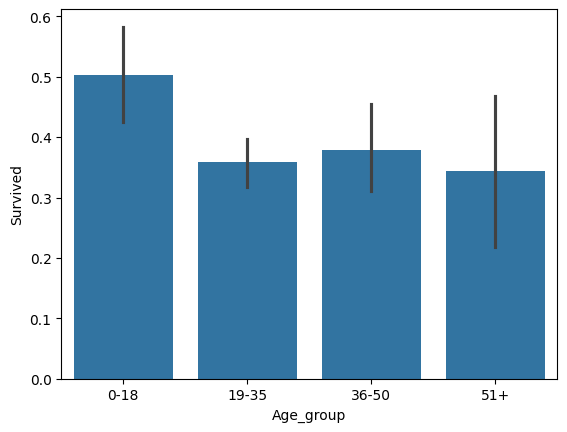

In [56]:
#Survival Rate by Age Groups:
sns.barplot(x='Age_group',y='Survived',data=df)
plt.show()

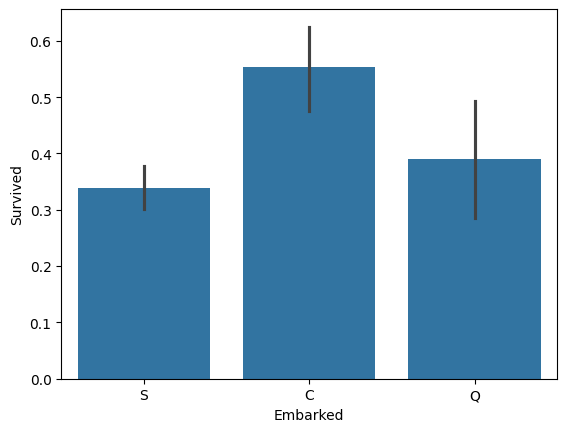

In [58]:
#Survival Rate by Embarked Location:
sns.barplot(x='Embarked',y='Survived',data=df)
plt.show()

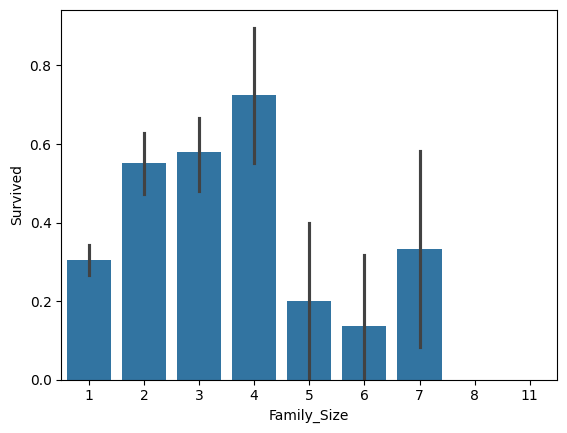

In [59]:
sns.barplot(x='Family_Size',y='Survived',data=df)
plt.show()

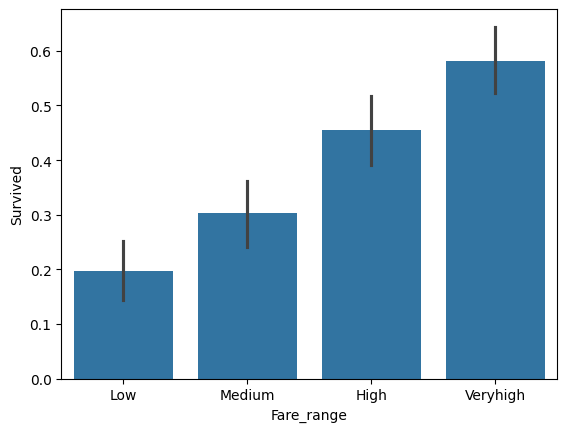

In [60]:
sns.barplot(x="Fare_range",y="Survived",data=df)
plt.show()

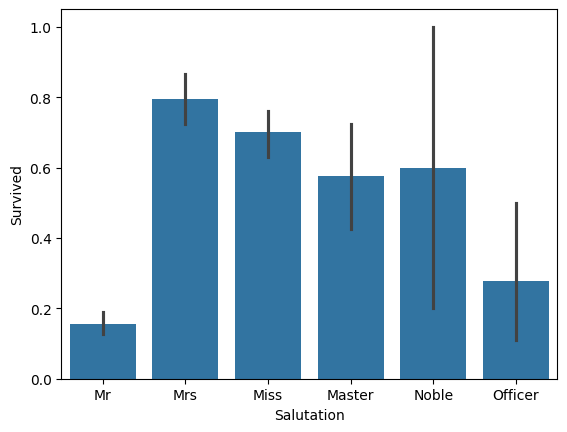

In [61]:
sns.barplot(x='Salutation',y='Survived',data=df)
plt.show()

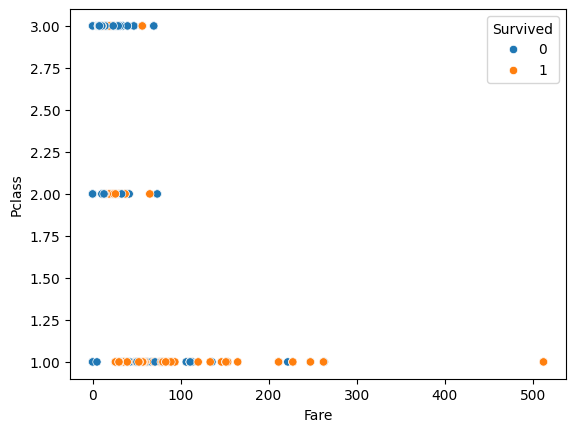

In [62]:
sns.scatterplot(x='Fare',y='Pclass',hue='Survived',data=df)
plt.show()

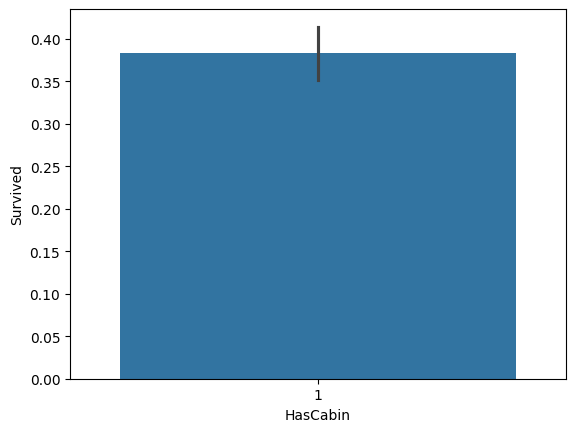

In [63]:
sns.barplot(x='HasCabin',y='Survived',data=df)
plt.show()